<a href="https://colab.research.google.com/github/uday-routhu/week5/blob/master/LogReg_Random_Forest_or_KNN_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LogReg, Random Forest, or KNN,  (Core):

- author: Udayakumar Routhu

# Tasks

1) Logistic Regression

  * a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix.
  
  * b) Then, use GridSearchCV to tune the solver, penalty type, and C values (inverse regularization strength), along with trying  "balanced" or None for class weight.  Be sure to change the default scoring to "recall_macro" when you instantiate the GridSearch.

  * Your C values should be logarithmic: i.e., [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
With elasticnet, remember to tune the ratio of l1 to l2, not C.
NOTE: Make sure to use a list of dictionaries to ensure you are testing compatible hyperparameters.  Refer to the previous lesson and/or LogisticRegression documentation to see which solvers support which penalty types.

  * c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

  * d) In a text cell, address these questions for your logistic regression models:
      * Which combination of hyperparameters led to the best-tuned model?


2) k-nearest neighbors

  * a) Start by creating and evaluating a default KNN model using appropriate metrics and a confusion matrix

  * b) Then, use GridSearchCV to tune the model. Be sure to change the default scoring to "recall_macro" when you instantiate the GridSearch.​

  Check the KNN documentation to choose hyperparameters to tune.
  * c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

  * d) In a text cell, address these questions for your KNN models:
      * Which combination of hyperparameters led to the best-tuned model?


3) Random Forest

  * a) Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix

  * b) Then, use GridSearchCV to tune the model.  Be sure to change the default scoring to "recall_macro" when you instantiate the GridSearch.​

  * Check the random forest documentation to choose hyperparameters to tune.  ​Be sure to include "balanced" or None for class weight.​
  * c) Make sure you have evaluated both the default and the tuned versions using appropriate metrics and a confusion matrix.

  * d) In a text cell, address these questions for your random forest models:

  * Which combination of hyperparameters led to the best-tuned model?

4) Answer this question in a text cell at the end of your notebook:
  * Which of your models would you recommend for production? Which metric or metrics did you use to decide that, and why?
```

### Import Libraries

In [90]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [91]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load the dataset

In [92]:
# Load in the dataset from url
fpath = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/stroke.csv"
df = pd.read_csv(fpath, index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


In [93]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 1137 rows, and 11 columns.
The rows represent 1137 observations, and the columns represent 10 features and 1 target variable.


# Prepare the Data

## Clean the Data**

In [94]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 1192 to 5731
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1137 non-null   object 
 1   age                1137 non-null   object 
 2   hypertension       1137 non-null   int64  
 3   heart_disease      1137 non-null   int64  
 4   ever_married       1137 non-null   object 
 5   work_type          1137 non-null   object 
 6   Residence_type     1137 non-null   object 
 7   avg_glucose_level  1137 non-null   float64
 8   bmi                1085 non-null   float64
 9   smoking_status     1137 non-null   object 
 10  stroke             1137 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 106.6+ KB


**Which columns should be converted to a numeric dtype?**
   - **Your Answer:**
      - age

In [95]:
# Clean 'age' column by converting non-numeric values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Convert 'age' column to integers, NaN will remain as float type
df['age'] = df['age'].astype('Int64')

# Confirm the datatype
df['age'].dtype

Int64Dtype()

In [96]:
# Check summary statistics
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1136.0,1137.000000,1137.000000,1137.000000,1085.000000,1137.000000
mean,45.15669,0.118734,0.068602,107.664002,29.198065,0.120493
std,23.054467,0.323617,0.252887,47.618723,7.669615,0.325680
min,0.0,0.000000,0.000000,55.270000,11.300000,0.000000
25%,28.0,0.000000,0.000000,77.600000,24.100000,0.000000
50%,48.0,0.000000,0.000000,91.820000,28.500000,0.000000
75%,63.0,0.000000,0.000000,113.850000,33.200000,0.000000
max,82.0,1.000000,1.000000,266.590000,64.400000,1.000000


- No errors noted.

In [97]:
df['stroke'].value_counts()

0    1000
1     137
Name: stroke, dtype: int64

In [98]:
df.duplicated().sum()

0

* there are no duplicated records

In [99]:
df.isna().sum()

gender                0
age                   1
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

- **Never use fillna() to impute values prior to Train_Test_Split, as it would cause data leakage.**

In [100]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")
    print(df[col])

- gender:
Female    642
Male      494
Other       1
Name: gender, dtype: int64



id
1192     Female
77       Female
59200      Male
24905    Female
24257      Male
          ...  
18205    Female
13622      Male
59749      Male
12109    Female
5731     Female
Name: gender, Length: 1137, dtype: object
- ever_married:
Yes    769
No     368
Name: ever_married, dtype: int64



id
1192      No
77        No
59200     No
24905    Yes
24257     No
        ... 
18205     No
13622     No
59749    Yes
12109    Yes
5731     Yes
Name: ever_married, Length: 1137, dtype: object
- work_type:
Private          672
Self-employed    174
children         147
Govt_job         142
Never_worked       2
Name: work_type, dtype: int64



id
1192     Govt_job
77       children
59200     Private
24905     Private
24257    children
           ...   
18205    children
13622    children
59749     Private
12109     Private
5731      Private
Name: work_type, Length: 1137, dtype: object
- Residence_type:
Urban    587
R

* There are no inconsistent categories

In [101]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 1192 to 5731
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1137 non-null   object 
 1   age                1136 non-null   Int64  
 2   hypertension       1137 non-null   int64  
 3   heart_disease      1137 non-null   int64  
 4   ever_married       1137 non-null   object 
 5   work_type          1137 non-null   object 
 6   Residence_type     1137 non-null   object 
 7   avg_glucose_level  1137 non-null   float64
 8   bmi                1085 non-null   float64
 9   smoking_status     1137 non-null   object 
 10  stroke             1137 non-null   int64  
dtypes: Int64(1), float64(2), int64(3), object(5)
memory usage: 107.7+ KB


In [102]:
# Obtain summary statistics
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1136.0,1137.000000,1137.000000,1137.000000,1085.000000,1137.000000
mean,45.15669,0.118734,0.068602,107.664002,29.198065,0.120493
std,23.054467,0.323617,0.252887,47.618723,7.669615,0.325680
min,0.0,0.000000,0.000000,55.270000,11.300000,0.000000
25%,28.0,0.000000,0.000000,77.600000,24.100000,0.000000
50%,48.0,0.000000,0.000000,91.820000,28.500000,0.000000
75%,63.0,0.000000,0.000000,113.850000,33.200000,0.000000
max,82.0,1.000000,1.000000,266.590000,64.400000,1.000000


### **Check Class Balance**

In [103]:
df['stroke'].value_counts(normalize = False)

0    1000
1     137
Name: stroke, dtype: int64

In [104]:
# Check how many samples of each class are present
df['stroke'].value_counts(normalize=True)

0    0.879507
1    0.120493
Name: stroke, dtype: float64

In [105]:
## Drop unwanted/inappropriate columns
bad_cols = ['ever_married','work_type','Residence_type','gender','smoking_status']
df = df.drop(columns=bad_cols)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,,,,,,
1192,31,0,0,70.66,27.2,0
77,13,0,0,85.81,18.6,0
59200,18,0,0,60.56,33.0,0
24905,65,0,0,205.77,46.0,1
24257,4,0,0,90.42,16.2,0


### **Split the Data**

In [115]:
# Define X and y
target = 'stroke'
X = df.drop(columns = [target]).copy()
y = df[target]

In [116]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


#### Class Balance

In [117]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.879108
1    0.120892
Name: stroke, dtype: float64

### **Transformers**

In [118]:
# Categorical Preprocessing Pipeline
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "Missing")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
# Numerical Preprocessing Pipeline
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

OneHotEncoder Columns: Index([], dtype='object')
Numeric Columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


#### Evaluation Functions

In [119]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                         output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                         label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                        output_dict=True,figsize=figsize,
                                        colorbar=colorbar, cmap=cmap_test,
                                        label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

### **Model**

###Logistic Regression

In [122]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=500, random_state=42)
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])

In [123]:
logreg_pipe.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
y_train

id
23427    0
68171    0
50536    0
35999    0
47427    0
        ..
71143    0
39769    0
70447    0
63864    0
11632    0
Name: stroke, Length: 852, dtype: int64

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       749
           1       0.50      0.15      0.23       103

    accuracy                           0.88       852
   macro avg       0.70      0.56      0.58       852
weighted avg       0.85      0.88      0.85       852



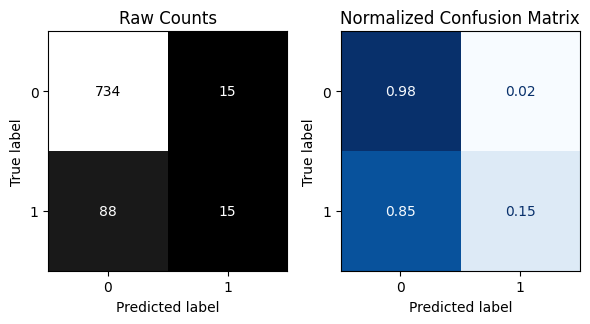


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       251
           1       0.40      0.12      0.18        34

    accuracy                           0.87       285
   macro avg       0.65      0.55      0.56       285
weighted avg       0.83      0.87      0.84       285



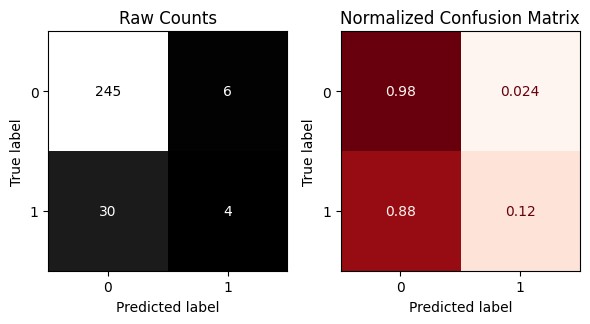

In [125]:
## Evaluate the model
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

### Using GridSearch CV

In [129]:
# Making a logreg pipe that uses L2 regularization
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(solver='liblinear',
                                                       max_iter=500,
                                                       penalty='l2',
                                                       random_state=42))
# Define the params and instantiate gridsearch
l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000,10000] }
gs = GridSearchCV(logreg_pipe, l2_params,verbose=True, n_jobs=-1,
                  return_train_score=True,scoring='recall_macro')
# Fit gridsearch and display best params
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'logisticregression__C': 0.0001,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       749
           1       0.46      0.18      0.26       103

    accuracy                           0.88       852
   macro avg       0.68      0.58      0.60       852
weighted avg       0.84      0.88      0.85       852



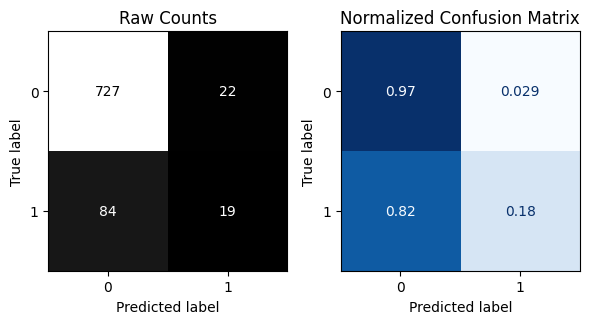


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       251
           1       0.25      0.12      0.16        34

    accuracy                           0.85       285
   macro avg       0.57      0.53      0.54       285
weighted avg       0.81      0.85      0.83       285



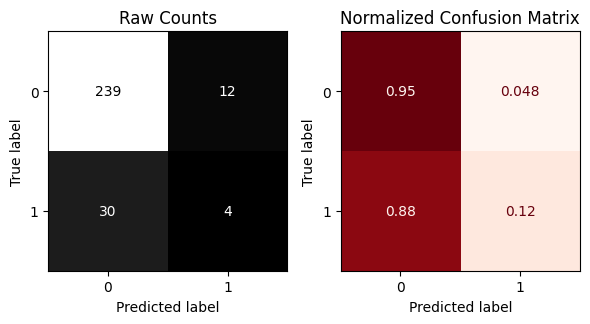

In [130]:
# Evalaute the best model
best_logreg = gs.best_estimator_
evaluate_classification(best_logreg, X_train, y_train, X_test, y_test)

###k-nearest neighbors

In [131]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate default KNN
knn = KNeighborsClassifier()

In [132]:
# Define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       749
           1       0.66      0.34      0.45       103

    accuracy                           0.90       852
   macro avg       0.79      0.66      0.70       852
weighted avg       0.88      0.90      0.88       852



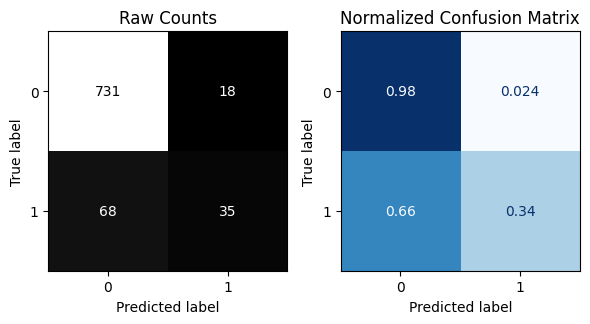


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       251
           1       0.14      0.03      0.05        34

    accuracy                           0.86       285
   macro avg       0.51      0.50      0.49       285
weighted avg       0.79      0.86      0.82       285



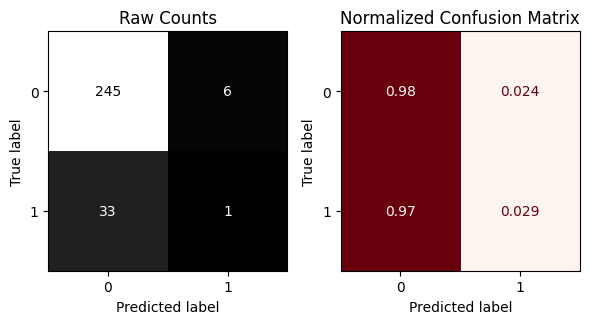

In [133]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

### ***KNN With Grid Search ***

In [134]:
# Making every other value from the range (odd values)
nneighbors_list = list(range(1,33,2))
nneighbors_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

In [135]:
# Get list of params for the knn model pipeline
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
        

In [154]:
# Create param grid
params={'kneighborsclassifier__n_neighbors': nneighbors_list}

In [155]:
# Instaniate GridSearchCV
gs = GridSearchCV(knn_pipe, params, verbose=True, n_jobs=-1,scoring='recall_macro')
# Fit gs on training data
gs.fit(X_train, y_train)
# Obtain best param value for K
gs.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'kneighborsclassifier__n_neighbors': 1}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       749
           1       0.60      0.15      0.23       103

    accuracy                           0.88       852
   macro avg       0.75      0.57      0.59       852
weighted avg       0.86      0.88      0.85       852



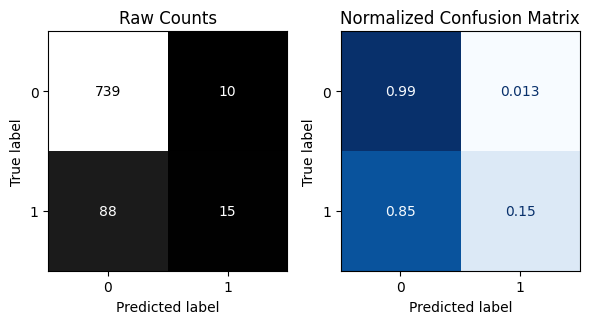


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.25      0.03      0.05        34

    accuracy                           0.87       285
   macro avg       0.57      0.51      0.49       285
weighted avg       0.81      0.87      0.83       285



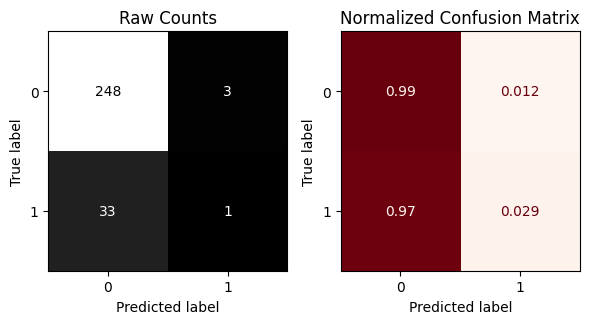

In [138]:
# Obtain complete evaluation for best performing model (k = 21)
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)

### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
# Define KNN model pipeline
rfc_pipe = make_pipeline(preprocessor, rfc)


In [151]:
# Fit the model pipeline on the training data only
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       103

    accuracy                           1.00       852
   macro avg       1.00      1.00      1.00       852
weighted avg       1.00      1.00      1.00       852



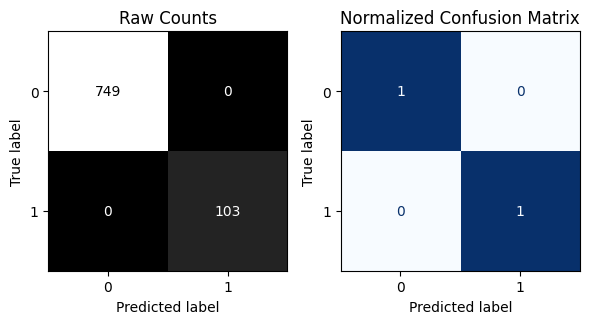


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       251
           1       0.29      0.12      0.17        34

    accuracy                           0.86       285
   macro avg       0.59      0.54      0.55       285
weighted avg       0.82      0.86      0.83       285



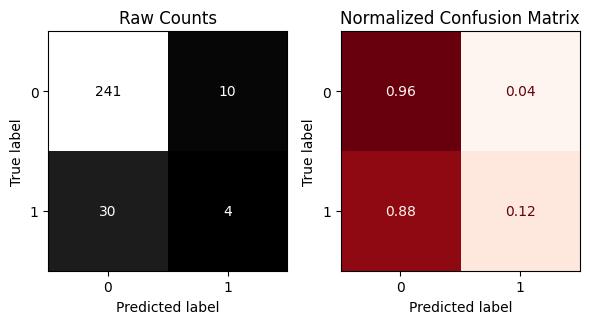

In [152]:
# Obtain evaluation metrics using custom function
evaluate_classification(rfc_pipe, X_train, y_train, X_test, y_test)

### Random Forest with GridSearchCV

In [162]:
# Instaniate GridSearchCV
none_params = {'logisticregression__solver' : ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag', 'saga'],
               'logisticregression__penalty' : [None]}

gs = GridSearchCV(logreg_pipe, none_params, verbose = 5, n_jobs = -1,
                  scoring='recall_macro')
# Fit the gs on the training data only
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'logisticregression__penalty': None, 'logisticregression__solver': 'lbfgs'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       749
           1       0.50      0.15      0.23       103

    accuracy                           0.88       852
   macro avg       0.70      0.56      0.58       852
weighted avg       0.85      0.88      0.85       852



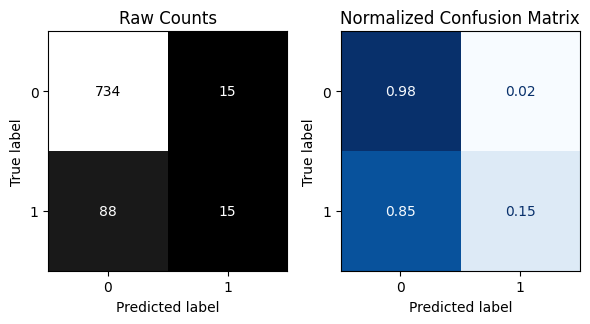


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       251
           1       0.40      0.12      0.18        34

    accuracy                           0.87       285
   macro avg       0.65      0.55      0.56       285
weighted avg       0.83      0.87      0.84       285



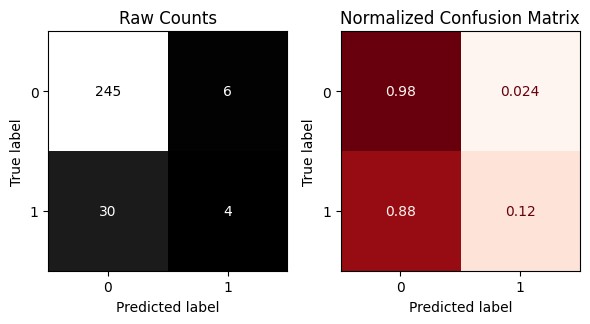

In [163]:
# Obtain complete evaluation for best performing model (k = 21)
evaluate_classification(gs.best_estimator_, X_train, y_train, X_test, y_test)